In [5]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sb
import sklearn as skl
import time
from IPython.display import display, clear_output

import sklearn
from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

set_config(display='diagram') # Useful for display the pipeline

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__) # Try to use 0.24

Pandas   1.1.3
Sklearn  0.23.2


In [6]:
path = "./tabular-playground-feb21/"
!ls $path

'ls' is not recognized as an internal or external command,
operable program or batch file.


### Load data

In [26]:
# 1 point 
 #load the train, test and sample_submission data using the is as the index column
df = pd.read_csv(r'D:\Strive\Strive\AI\M4_Feature_Eng\03. Numerical Enc\train.csv', index_col="id")
df_t = pd.read_csv(r'D:\Strive\Strive\AI\M4_Feature_Eng\03. Numerical Enc\test.csv', index_col="id")
sub = pd.read_csv(r'D:\Strive\Strive\AI\M4_Feature_Eng\03. Numerical Enc\sample_submission.csv', index_col="id")


print("Train dataframe:", df.shape)
print("Test dataframe:", df_t.shape)
df.head()

Train dataframe: (300000, 25)
Test dataframe: (200000, 24)


,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,A,B,D,A,E,C,I,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
2,B,A,A,A,B,B,A,E,A,F,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
3,A,A,A,C,B,D,A,B,C,N,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
4,A,A,A,C,B,D,A,E,G,K,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
6,A,B,A,A,B,B,A,E,C,F,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [27]:
print(sub.shape)
assert df.shape == (300000,25) 
assert df_t.shape == (200000,24) 
assert sub.shape == (200000,1) 

(200000, 1)


### Subsample the data

In [28]:
#1 point
# get a random sample of size 50k, tested with random state 0
dfs = df.sample(50000)

In [29]:
assert dfs.shape == (50000,25)

### There are no missings in this dataset

In [30]:
df.isna().sum().sum(), df_t.isna().sum().sum()

(0, 0)

In [31]:
df.columns

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13',
       'target'],
      dtype='object')

### Define variables for x and y

In [48]:
cat_vars = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
num_vars = ['cont0', 'cont1', 'cont2', 'cont3',  'cont4',  'cont5',  'cont6',
            'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']

In [56]:


# 1 point 
# store in X all the categorical and numerical columns
# store in Y the target

x = dfs.iloc[:,1:25]
y = dfs['target']


In [58]:
x

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
311054,A,A,C,B,C,A,E,G,I,0.673510,...,0.822897,0.454463,0.295018,0.610883,0.636243,0.716658,0.630756,0.673692,0.228243,5.138600
171895,B,A,C,B,D,A,E,E,L,0.375175,...,0.894846,0.423560,0.283848,0.621990,0.353105,0.716697,0.716873,0.682675,0.650241,6.816578
157841,A,A,C,B,B,A,E,E,M,0.459839,...,0.173574,0.408358,0.283629,0.142592,0.260050,0.195953,0.594757,0.265188,0.290226,7.074654
442621,B,B,C,B,B,A,E,E,H,0.269349,...,0.362109,0.344678,0.256351,0.159262,0.347759,0.257262,0.414939,0.306067,0.745010,7.533817
30895,B,A,A,B,B,A,E,A,I,0.651302,...,0.588558,0.441474,0.723062,0.296259,0.652521,0.745514,0.894677,0.349570,0.739816,8.473261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92864,B,A,C,B,B,A,E,E,L,0.195908,...,0.261619,0.371467,0.357114,0.316066,0.279024,0.242157,0.324894,0.373680,0.838682,8.718333
303231,B,A,C,B,B,A,E,E,B,0.314503,...,0.342867,0.339510,0.664287,0.461401,0.365616,0.428991,0.697404,0.294689,0.417097,7.844518
235151,B,A,C,B,B,A,E,E,M,0.346176,...,0.248508,0.299113,0.245538,0.109496,0.318555,0.317656,0.207031,0.348893,0.743520,8.319348


In [57]:
assert x.shape == (50000,24)
assert y.shape == (50000,)

### See the target variable ([The metric is RMSE](https://www.kaggle.com/c/tabular-playground-series-feb-2021/overview/evaluation))

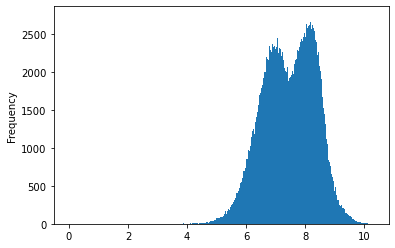

In [59]:
df.target.plot.hist(bins=500);

### See the numerical variables

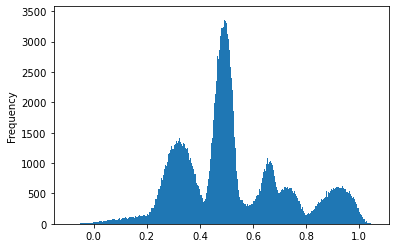

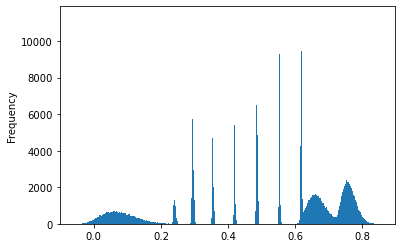

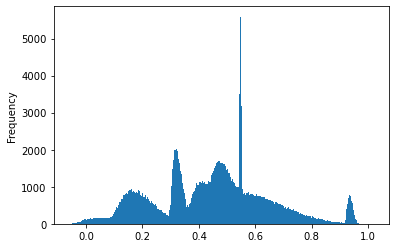

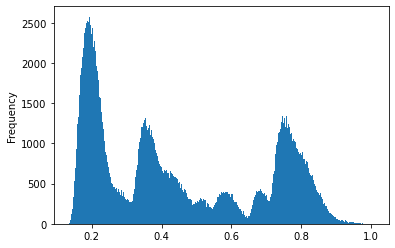

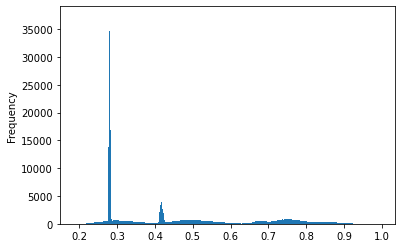

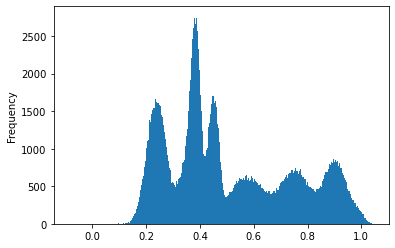

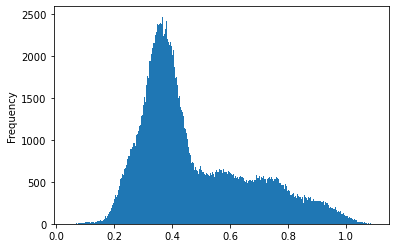

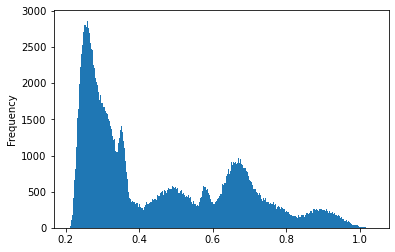

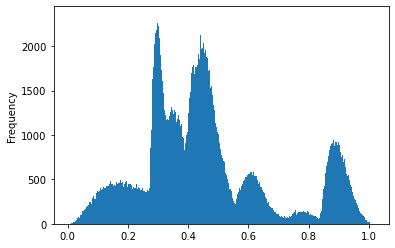

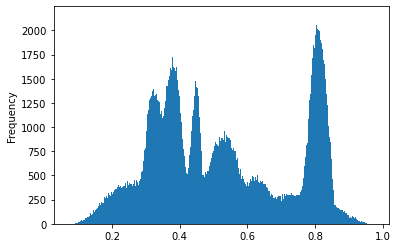

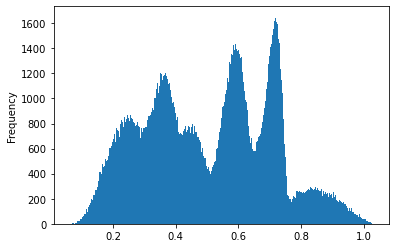

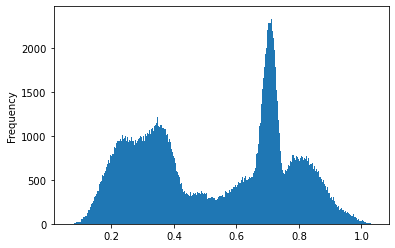

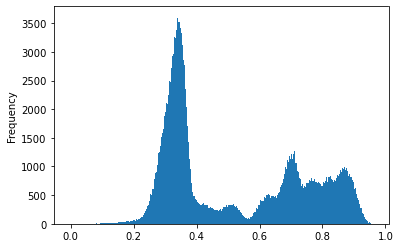

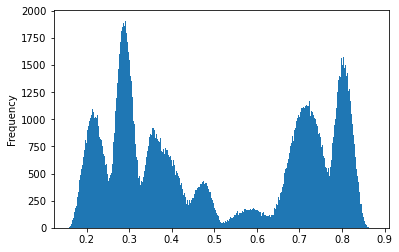

In [60]:
for var in num_vars:
    df[var].plot.hist(bins=500)
    plt.show();

### See the categorical variables (ypu can use `bar()`, `barh()` or `.pie()`)

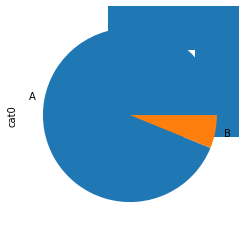

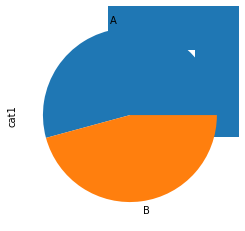

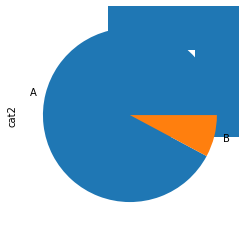

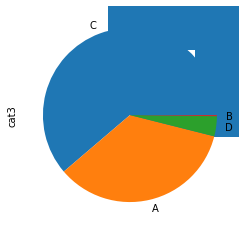

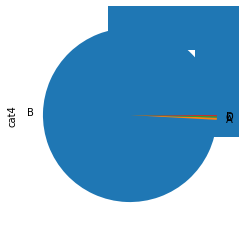

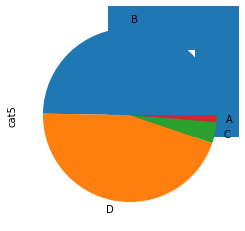

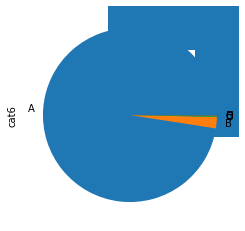

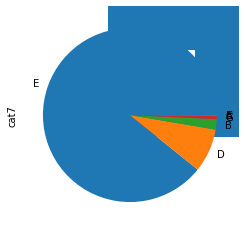

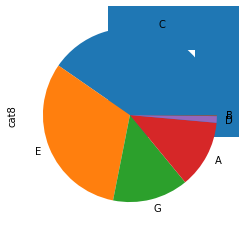

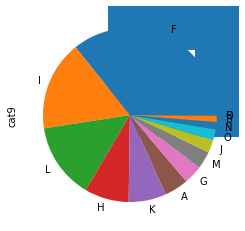

In [61]:
for var in cat_vars:
    df[var].value_counts().plot.bar()
    df[var].value_counts().plot.barh()
    df[var].value_counts().plot.pie()
    plt.show();

# Exercise 1 (2 pts)

Create the `ColumTransformer` for **models based on multiplications and distances**:
- Pipeline for numerical variables (`num_vars`): `Standardscaler()` or `QuantileTransformer(n_quantiles=100, output_distribution='normal')`
- Pipeline for categorical variables (`cat_vars`): `OneHotEncoder(handle_unknown='ignore')`

In [108]:
from sklearn.compose import ColumnTransformer

num_tree = pipeline.Pipeline(steps=[('scalar',preprocessing.StandardScaler()),
])

cat_tree = pipeline.Pipeline(steps=[  ('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore'))
])
tree_prepro = compose.ColumnTransformer(transformers=[('numerical', num_tree, num_vars), ('categorical', cat_tree , cat_vars),
    
],remainder='drop')

tree_prepro

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('scalar', StandardScaler())]),
                                 ['cont0', 'cont1', 'cont2', 'cont3', 'cont4',
                                  'cont5', 'cont6', 'cont7', 'cont8', 'cont9',
                                  'cont10', 'cont11', 'cont12', 'cont13']),
                                ('categorical',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['cat0', 'cat1', 'cat2', 'cat3', 'cat4',
                                  'cat5', 'cat6', 'cat7', 'cat8', 'cat9'])])

In [78]:
assert type(tree_prepro) is sklearn.compose._column_transformer.ColumnTransformer

# Exercise 2 (2 pts)

Create the `ColumTransformer` for **models based on trees**:
- Pipeline for numerical variables (`num_vars`): **Do nothing**. Tip: You can use `remainder='passthrough'` when you create the `ColumTransformer`.
- Pipeline for categorical variables (`cat_vars`): `OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)[source]`

In [121]:
from sklearn.compose import ColumnTransformer
num_mult = pipeline.Pipeline(steps=[('scalar',preprocessing.QuantileTransformer(n_quantiles=100, output_distribution='normal'))
])

cat_mult = pipeline.Pipeline(steps=[  ('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore'))])
mult_prepro = compose.ColumnTransformer(transformers=[('numerical', num_mult, num_vars), ('categorical', cat_mult , cat_vars)    
],remainder='passthrough')

mult_prepro

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('scalar',
                                                  QuantileTransformer(n_quantiles=100,
                                                                      output_distribution='normal'))]),
                                 ['cont0', 'cont1', 'cont2', 'cont3', 'cont4',
                                  'cont5', 'cont6', 'cont7', 'cont8', 'cont9',
                                  'cont10', 'cont11', 'cont12', 'cont13']),
                                ('categorical',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['cat0', 'cat1', 'cat2', 'cat3', 'cat4',
                                  'cat5', 'cat6', 'cat7', 'cat8', 'cat9'])])

In [122]:
assert type(mult_prepro) is sklearn.compose._column_transformer.ColumnTransformer

## Exercise 3 (2pts)
Reasearch about som models and its hyperparamters

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [126]:

from sklearn.metrics import mean_squared_error
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x, y, test_size=0.4, random_state=0)

results = pd.DataFrame({'Model': [], 'MSE': [], 'RMSE': [], 'Time': []})

for name, pipe in all_pipelines.items():

    start_time = time.time()
    preds = pipe.predict(y_valid)
        
    results = results.append({"Model": name,
                              "MSE":   metrics.mean_squared_error(y_valid, preds),
                              "RMSE":  np.sqrt(metrics.mean_squared_error(y_valid, preds)),
                              "Time":  total_time},
                              ignore_index=True)
   
    
    results_ord = results.sort_values(by=['RMSE'], ascending=True, ignore_index=True)
    results_ord.index += 1 
    clear_output()
    display(results_ord.style.bar(subset=['MSE', 'RMSE'], vmin=0, color='#5fba7d'))

NameError: name 'all_pipelines' is not defined

In [ ]:
assert results_ord['MSE'].max() < 2
assert results_ord['MSE'].min() < 0.8
assert results_ord['RMSE'].max() < 1.5
assert results_ord['RMSE'].min() < 0.9

### Optional Exercise (optional because it takes a lot of time of computation)
Train with a more realable validation data the best models (maybe the best 5 models). You can:
- Use all training data (without subsample)
- Use Crosvalidation (`KFold`)(using 3, 5 or 7 folds) instead of `train_test_split`

In [ ]:
df   = pd.read_csv(path+"train.csv", index_col="id")

print("Using all data with", len(df), "rows")
x = df[num_vars+cat_vars]
y = df["target"]

In [ ]:
# IMPLEMENT SOMETHING SIMILAR TO THE PROCESS BEFORE
# BUT USE KFOLD

# YOUR CODE HERE
raise NotImplementedError()